# 3D component creation and reuse

Here is a workflow for creating a 3D component and reusing it:

Step 1: Create an antenna using PyAEDT and HFSS 3D Modeler. (The antenna can also be created using EDB and
HFSS 3D Layout).

Step 2. Store the object as a 3D component on the disk.

Step 3. Reuse the 3D component in another project.

Step 4. Parametrize and optimize the target design.

Keywords: **AEDT**, **General**, **3D component**.

## Perform imports and define constants
Import the required packages.

In [1]:
import os
import tempfile
import time

In [2]:
from ansys.aedt.core import Hfss

Define constants.

In [3]:
AEDT_VERSION = "2024.2"
NG_MODE = False  # Open AEDT UI when it is launched.

## Create temporary directory

Create a temporary directory where downloaded data or
dumped data can be stored.
If you'd like to retrieve the project data for subsequent use,
the temporary folder name is given by ``temp_folder.name``.

In [4]:
temp_folder = tempfile.TemporaryDirectory(suffix=".ansys")

Create an HFSS object.

In [5]:
hfss = Hfss(
    version=AEDT_VERSION,
    new_desktop=True,
    close_on_exit=True,
    non_graphical=NG_MODE,
    solution_type="Modal",
)
hfss.save_project(os.path.join(temp_folder.name, "example.aedt"))

PyAEDT INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


PyAEDT INFO: PyAEDT version 0.12.dev0.


PyAEDT INFO: Initializing new Desktop session.


PyAEDT INFO: Log on console is enabled.


PyAEDT INFO: Log on file C:\Users\ansys\AppData\Local\Temp\pyaedt_ansys_2bd6a98a-1025-4299-99d3-86853cacba05.log is enabled.


PyAEDT INFO: Log on AEDT is enabled.


PyAEDT INFO: Debug logger is disabled. PyAEDT methods will not be logged.


PyAEDT INFO: Launching PyAEDT with gRPC plugin.


PyAEDT INFO: New AEDT session is starting on gRPC port 51985


PyAEDT INFO: AEDT installation Path C:\Program Files\AnsysEM\v242\Win64


PyAEDT INFO: Ansoft.ElectronicsDesktop.2024.2 version started with process ID 4116.


PyAEDT INFO: Project Project1 has been created.


PyAEDT INFO: No design is present. Inserting a new design.


PyAEDT INFO: Added design 'HFSS_2KH' of type HFSS.


PyAEDT INFO: Aedt Objects correctly read


PyAEDT INFO: Project example Saved correctly


True

## Define variables

PyAEDT can create and store all variables available in AEDT (such as design, project,
and postprocessing).

In [6]:
hfss["thick"] = "0.1mm"
hfss["width"] = "1mm"

##  Create modeler objects

PyAEDT supports all modeler functionalities available in AEDT.
You can create, delete, and modify objects using all available Boolean operations.
PyAEDT can also fully access history.

In [7]:
substrate = hfss.modeler.create_box(
    ["-width", "-width", "-thick"],
    ["2*width", "2*width", "thick"],
    material="FR4_epoxy",
    name="sub",
)

patch = hfss.modeler.create_rectangle(
    "XY", ["-width/2", "-width/2", "0mm"], ["width", "width"], name="patch1"
)

via1 = hfss.modeler.create_cylinder(
    2,
    ["-width/8", "-width/4", "-thick"],
    "0.01mm",
    "thick",
    material="copper",
    name="via_inner",
)

via_outer = hfss.modeler.create_cylinder(
    2,
    ["-width/8", "-width/4", "-thick"],
    "0.025mm",
    "thick",
    material="Teflon_based",
    name="via_teflon",
)

PyAEDT INFO: Modeler class has been initialized! Elapsed time: 0m 1sec


PyAEDT INFO: Materials class has been initialized! Elapsed time: 0m 0sec


## Assign bundaries

Most of HFSS boundaries and excitations are already available in PyAEDT.
You can easily assign a boundary to a face or to an object by taking advantage of
Object-Oriented Programming (OOP) available in PyAEDT.

### Assign Perfect E boundary to sheets

Assign a Perfect E boundary to sheets.

In [8]:
hfss.assign_perfecte_to_sheets(patch)

PyAEDT INFO: Boundary Perfect E PerfE_RSVA9R has been correctly created.


### Assign boundaries to faces

Assign boundaries to the top and bottom faces of an object.

In [9]:
side_face = [
    i
    for i in via_outer.faces
    if i.id not in [via_outer.top_face_z.id, via_outer.bottom_face_z.id]
]

hfss.assign_perfecte_to_sheets(side_face)
hfss.assign_perfecte_to_sheets(substrate.bottom_face_z)

PyAEDT INFO: Boundary Perfect E PerfE_2E9HO8 has been correctly created.


PyAEDT INFO: Boundary Perfect E PerfE_TJLAI5 has been correctly created.


## Create wave port

You can assign a wave port to a sheet or to a face of an object.

In [10]:
hfss.wave_port(
    via_outer.bottom_face_z,
    name="P1",
)

PyAEDT INFO: Boundary Wave Port P1 has been correctly created.


## Create 3D component

Once the model is ready, you can create a 3D component.
Multiple options are available to partially select objects, coordinate systems,
boundaries, and mesh operations. You can also create encrypted 3D components.

In [11]:
component_path = os.path.join(temp_folder.name, "component_test.aedbcomp")
hfss.modeler.create_3dcomponent(component_path, "patch_antenna")

PyAEDT INFO: Mesh class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Mesh class has been initialized! Elapsed time: 0m 0sec


True

## Manage multiple project

PyAEDT lets you control multiple projects, designs, and solution types at the same time.

In [12]:
new_project = os.path.join(temp_folder.name, "new_project.aedt")
hfss2 = Hfss(
    version=AEDT_VERSION,
    project=new_project,
    design="new_design",
    solution_type="Modal",
)

PyAEDT INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


PyAEDT INFO: PyAEDT version 0.12.dev0.


PyAEDT INFO: Returning found Desktop session with PID 4116!


PyAEDT INFO: Project new_project has been created.


PyAEDT INFO: Added design 'new_design' of type HFSS.


PyAEDT INFO: Aedt Objects correctly read


## Insert 3D component

You can insert a 3D component without supplying additional information.
All needed information is read from the file itself.

In [13]:
hfss2.modeler.insert_3d_component(component_path)

PyAEDT INFO: Modeler class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Parsing C:/Users/ansys/AppData/Local/Temp/tmpg_ftejcl.ansys/new_project.aedt.


PyAEDT INFO: File C:/Users/ansys/AppData/Local/Temp/tmpg_ftejcl.ansys/new_project.aedt correctly loaded. Elapsed time: 0m 0sec


PyAEDT INFO: aedt file load time 0.0


## Parametrize 3D components

You can specify parameters for any 3D components.

In [14]:
hfss2.modeler.user_defined_components["patch_antenna1"].parameters
hfss2["p_thick"] = "1mm"
hfss2.modeler.user_defined_components["patch_antenna1"].parameters["thick"] = "p_thick"

## Insert multiple 3D components

There is no limit to the number of 3D components that can be inserted in a design.
These components can be the same or linked to different files.

In [15]:
hfss2.modeler.create_coordinate_system(origin=[20, 20, 10], name="Second_antenna")
ant2 = hfss2.modeler.insert_3d_component(
    component_path, coordinate_system="Second_antenna"
)

## Move 3D components

Move a 3D component by either changing its position or moving the relative coordinate system.

In [16]:
hfss2.modeler.coordinate_systems[0].origin = [10, 10, 3]

## Create air region

Create an air region and assign a boundary to a face or an object.

In [17]:
hfss2.modeler.create_air_region(30, 30, 30, 30, 30, 30)
hfss2.assign_radiation_boundary_to_faces(hfss2.modeler["Region"].faces)

PyAEDT INFO: Boundary Radiation Rad__XEDONO has been correctly created.


## Create setup and optimetrics analysis

Once a project is ready to be solved, use PyAEDT to create a setup and parametrics analysis.
All setup parameters can be edited.

In [18]:
setup1 = hfss2.create_setup()
optim = hfss2.parametrics.add("p_thick", "0.2mm", "1.5mm", step=14)

## Plot objects

PyAEDT INFO: PostProcessor class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Post class has been initialized! Elapsed time: 0m 0sec


C:\actions-runner\_work\pyaedt-examples\pyaedt-examples\.venv\lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


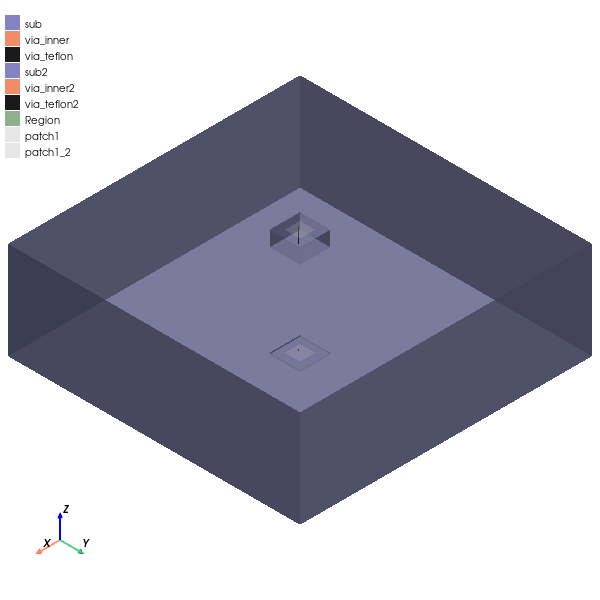

In [19]:
hfss2.modeler.fit_all()
hfss2.plot(
    show=False,
    output_file=os.path.join(hfss.working_directory, "Image.jpg"),
    plot_air_objects=True,
)

## Release AEDT

In [20]:
hfss2.save_project()
hfss2.release_desktop()
# Wait 3 seconds to allow AEDT to shut down before cleaning the temporary directory.
time.sleep(3)

PyAEDT INFO: Project new_project Saved correctly


PyAEDT INFO: Desktop has been released and closed.


## Clean up

All project files are saved in the folder ``temp_folder.name``.
If you've run this example as a Jupyter notebook, you
can retrieve those project files. The following cell removes
all temporary files, including the project folder.

In [21]:
temp_folder.cleanup()